#### Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [4]:
path = r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets'

In [6]:
df = pd.read_csv(os.path.join(path, 'cleaned_weather_date.csv'), index_col = 0)

In [8]:
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [15]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Wrangling 

In [55]:
df_oslo = df.loc[:, df.columns.str.startswith("OSLO")]

In [57]:
df_oslo

,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9
1,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9
2,8,0.69,1.0234,0.04,0.08,0.0,1.9,0.6,3.1
3,8,0.98,1.0244,0.04,0.35,0.0,3.0,0.4,4.9
4,8,0.96,1.0092,0.05,0.26,0.0,3.7,2.9,4.9
...,...,...,...,...,...,...,...,...,...
22945,8,0.98,1.0139,1.06,0.21,0.1,9.7,5.8,12.0
22946,8,1.00,1.0107,1.06,0.21,0.0,10.9,8.8,11.7
22947,3,0.85,1.0082,1.06,0.21,6.8,9.7,7.7,14.2
22948,5,0.94,1.0150,1.06,0.21,2.9,5.9,2.1,8.1


In [59]:
pleasant_oslo = pleasant['OSLO_pleasant_weather']

In [61]:
df_oslo.shape

(22950, 9)

In [63]:
pleasant_oslo.shape

(22950,)

### Converting to Array and Splitting Data

In [65]:
X = np.array(df_oslo)
y = np.array(pleasant_oslo)

In [67]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [69]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Training Model

In [71]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


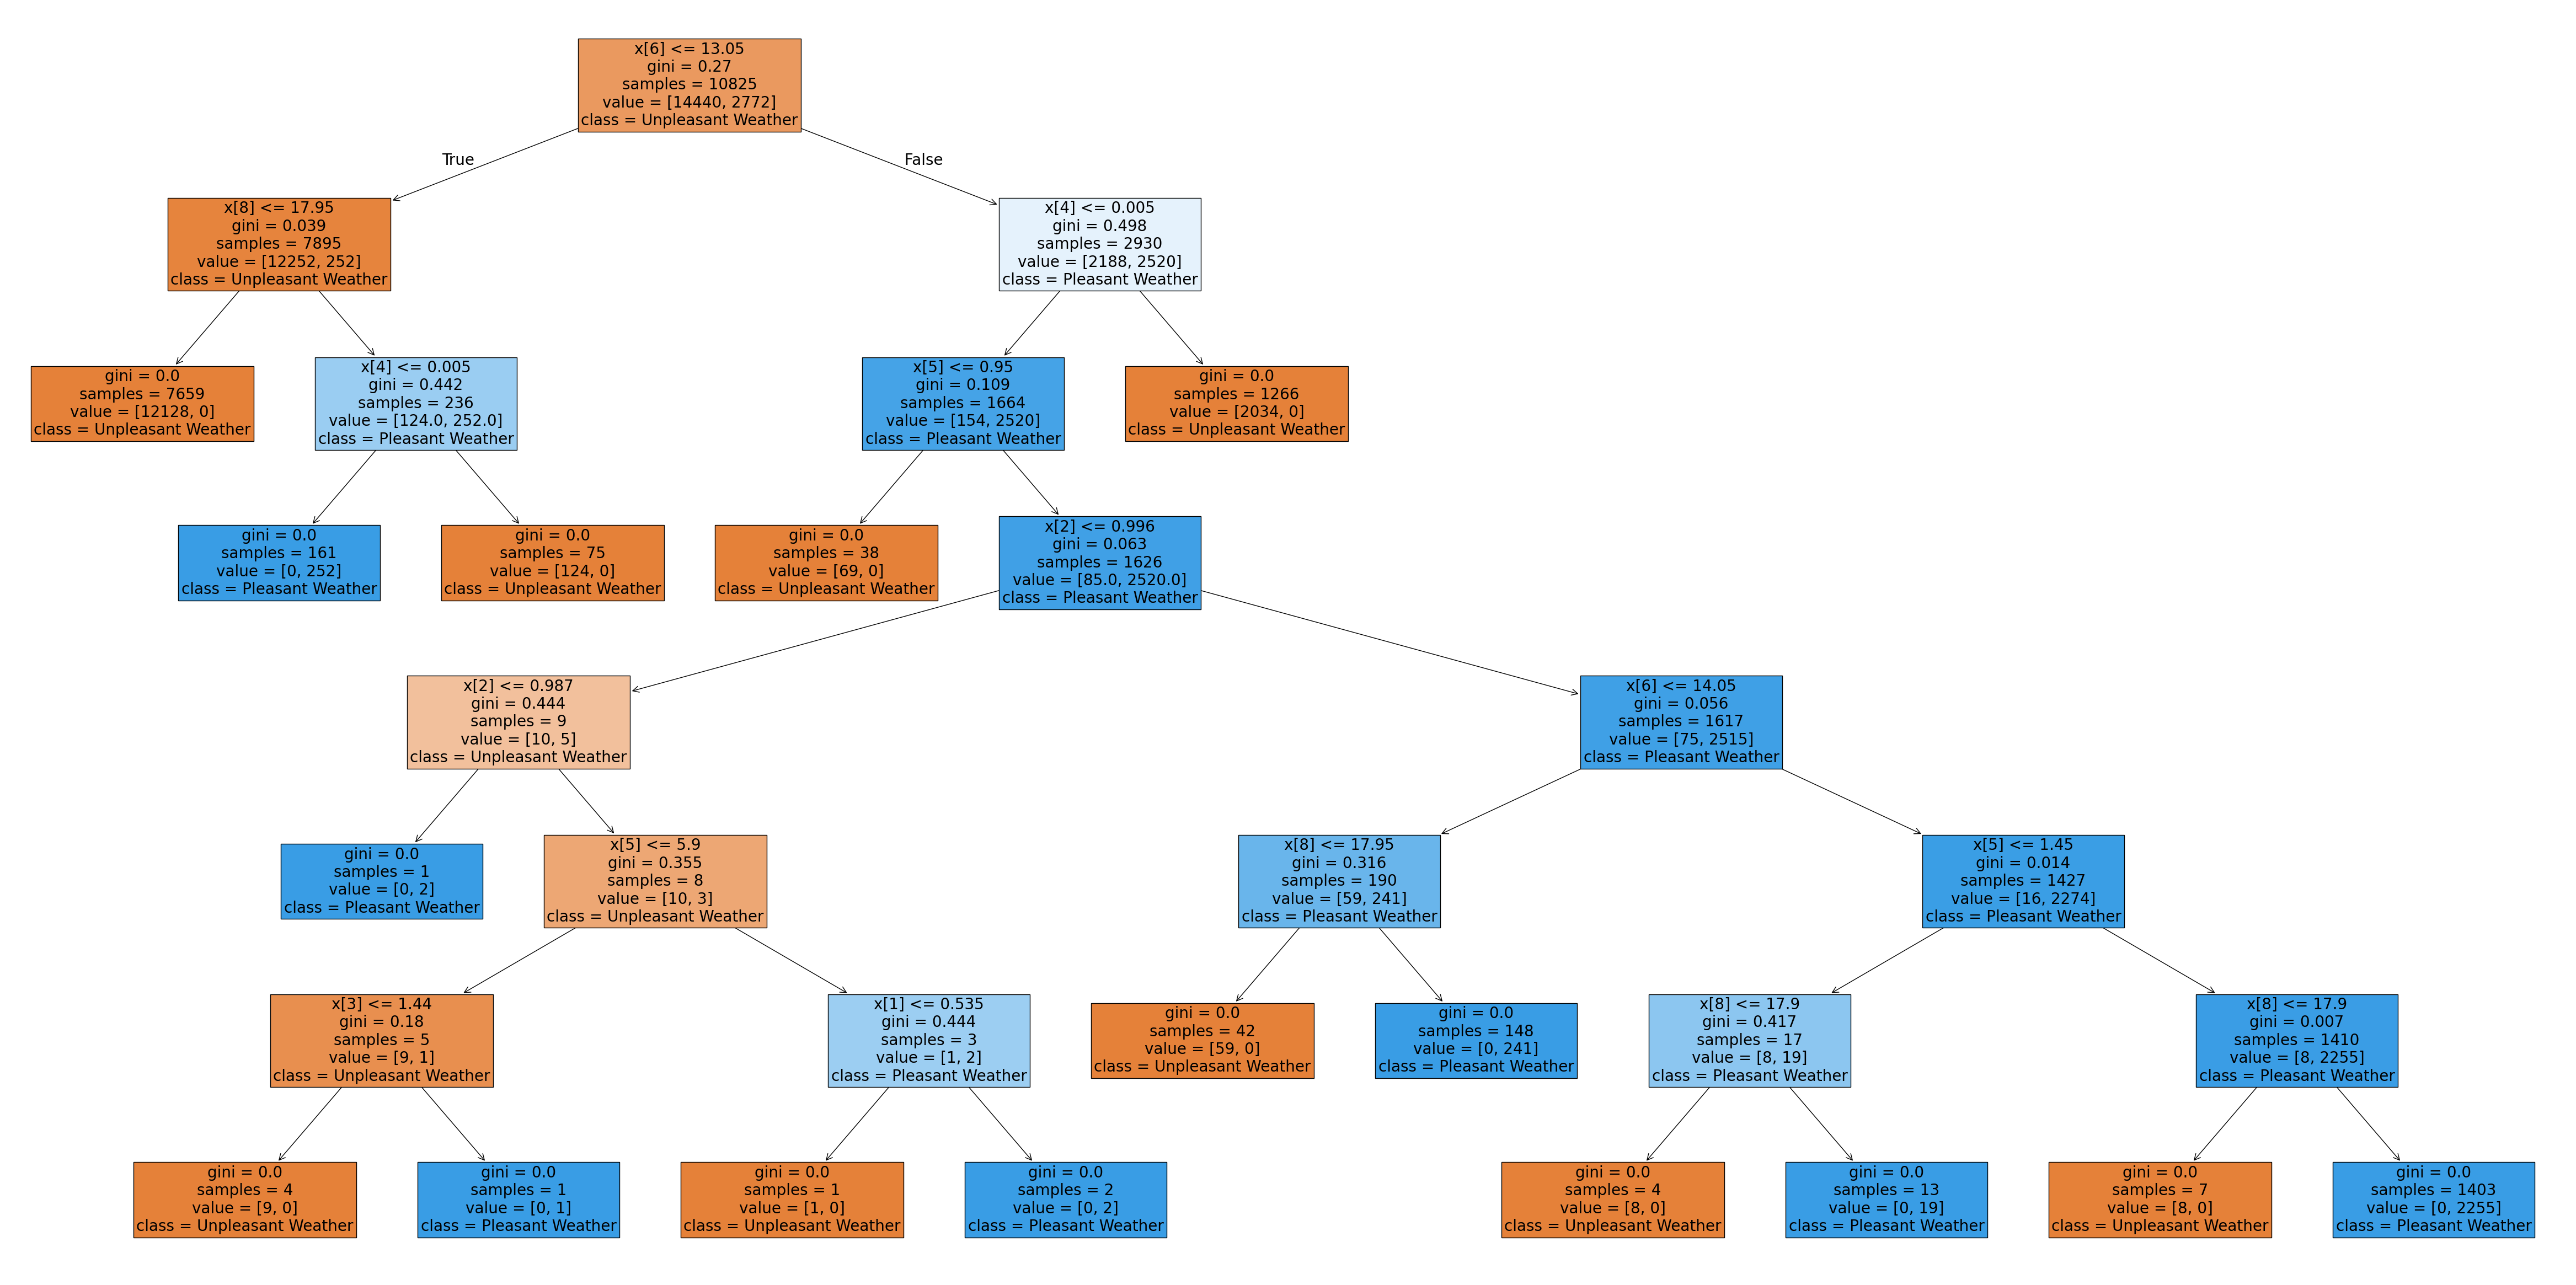

In [77]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(60, 30))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

### Feature Importance

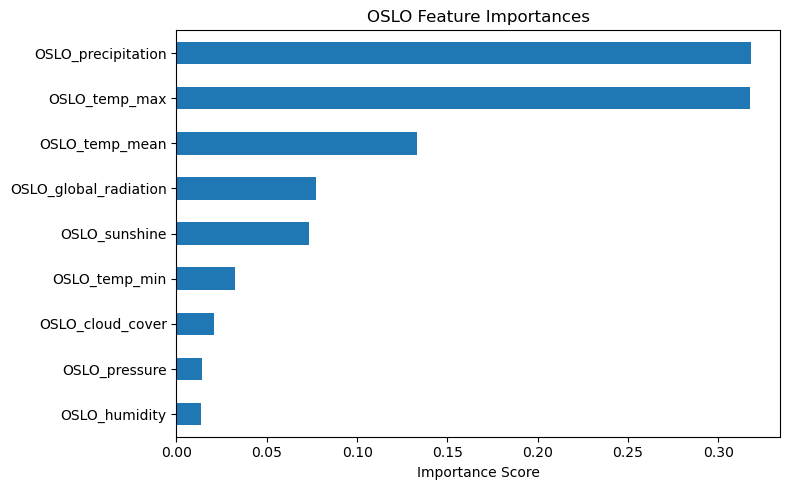

In [81]:
# Create a Series for oslo feature importances
important_oslo = pd.Series(clf.feature_importances_, index=df_oslo.columns)

# Plot top features (all 9 in this case)
important_oslo.sort_values(ascending=False).plot(kind='barh', figsize=(8, 5))
plt.title("OSLO Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  # Show most important at the top
plt.tight_layout()
plt.show()